In [10]:
import os
import sys
%pip install -q ipywidgets
import ipywidgets as widgets

directorio = '../Results'
# para colab
# directorio = '/content' # si es un directorio en el que se subieron los archivos a colab o en drive agregar ruta

# Leer archivos xlsx dentro de la carpeta Data
files = os.listdir(directorio)
files = [f for f in files if f.endswith('.xlsx')]

# Seleccionar archivo a leer
dropdown = widgets.Dropdown(
  options=[('Seleccionar archivo', None)] + [(f, f) for f in files],
  description='Archivo:',
  disabled=False,
)
nombre_archivo = '';
def on_change(change):
  if change['type'] == 'change' and change['name'] == 'value':
    if change['new'] is not None:
      global nombre_archivo
      nombre_archivo = change['new']
      print('Archivo seleccionado:', nombre_archivo)

dropdown.observe(on_change)
display(dropdown)


Note: you may need to restart the kernel to use updated packages.


Dropdown(description='Archivo:', options=(('Seleccionar archivo', None), ('03_clusters_con_outliers.xlsx', '03…

Archivo seleccionado: 04_clusters_sin_outliers-v2.xlsx


In [11]:
import pandas as pd

# Leer archivo seleccionado
path = os.path.join(directorio, nombre_archivo)

df = pd.read_excel(path)

# get numerical features in the DataFrame
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# quitar columnas que no son features
numerical_features = numerical_features.drop(['cluster_kmeans', 'cluster_hc'])

,alumnos,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,1p_total_actividades_entregadas,1p_porcentaje_evidencias_calificadas_tiempo,1p_total_actividades_calificadas_tiempo,1p_porcentaje_aprobados,2p_total_actividades_asignadas,...,2p_total_actividades_entregadas,2p_porcentaje_evidencias_calificadas_tiempo,2p_total_actividades_calificadas_tiempo,2p_porcentaje_aprobados,total_actividades_calificadas,trabajos_por_calificar,correos_enviados,correos_recibidos,cluster_kmeans,cluster_hc
0,25,18,18,1.0,438,438.0,0.998,437.0,0,19.0,...,452.0,1.0,452.0,0,890.0,0.0,5.75,2.25,3,2
1,23,19,19,1.0,402,402.0,1.000,402.0,0,20.0,...,380.0,1.0,380.0,0,782.0,0.0,43.00,17.00,3,2
2,43,5,5,1.0,131,131.0,1.000,131.0,0,0.0,...,0.0,0.0,0.0,0,131.0,0.0,7.50,2.50,1,1
3,16,6,6,1.0,89,89.0,1.000,89.0,0,10.0,...,139.0,1.0,139.0,81,228.0,0.0,21.00,18.00,2,3
4,20,6,6,1.0,102,102.0,1.000,102.0,0,10.0,...,137.0,1.0,137.0,50,239.0,0.0,20.75,13.25,2,3


array([[25.  , 18.  , 18.  , ...,  0.  ,  5.75,  2.25],
       [23.  , 19.  , 19.  , ...,  0.  , 43.  , 17.  ],
       [43.  ,  5.  ,  5.  , ...,  0.  ,  7.5 ,  2.5 ],
       ...,
       [47.  , 14.  , 12.  , ...,  0.  , 16.  ,  2.  ],
       [31.  , 14.  , 11.  , ...,  1.  , 18.5 ,  1.  ],
       [47.  , 10.  ,  7.  , ..., 43.  ,  5.25,  1.  ]])

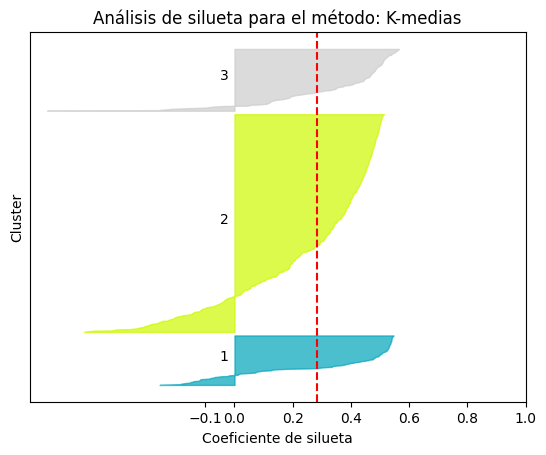

array([[25.  , 18.  , 18.  , ...,  0.  ,  5.75,  2.25],
       [23.  , 19.  , 19.  , ...,  0.  , 43.  , 17.  ],
       [43.  ,  5.  ,  5.  , ...,  0.  ,  7.5 ,  2.5 ],
       ...,
       [47.  , 14.  , 12.  , ...,  0.  , 16.  ,  2.  ],
       [31.  , 14.  , 11.  , ...,  1.  , 18.5 ,  1.  ],
       [47.  , 10.  ,  7.  , ..., 43.  ,  5.25,  1.  ]])

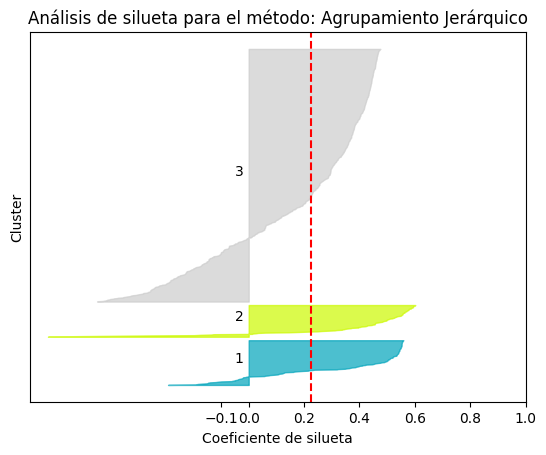

Promedio de silueta para K-medias: 0.28371350367417075
Promedio de silueta para Agrupamiento Jerárquico: 0.22325073682638566


In [12]:
# El coeficiente de silueta mide la calidad de un clustering basándose en qué tan similar es un objeto a su propio cluster comparado con otros clusters.
# df ya tiene los labes de 'cluster_kmeans', 'cluster_hc'
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular y graficar los coeficientes de silueta para un método de clustering específico
def plot_silhouette(df, labels, title):
  X = df[numerical_features].values
  display(X)
  cluster_labels = df[labels]
  silhouette_avg = silhouette_score(X, cluster_labels)
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  fig, ax = plt.subplots()
  y_lower = 10
  for i in np.unique(cluster_labels):
    # Agregar los coeficientes de silueta del cluster i y ordenarlos
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(np.unique(cluster_labels)))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetar los gráficos con los números de cluster en el medio
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

  ax.set_title("Análisis de silueta para el método: " + title)
  ax.set_xlabel("Coeficiente de silueta")
  ax.set_ylabel("Cluster")

  # La línea vertical para el coeficiente de silueta medio
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax.set_yticks([])  # Clear the yaxis labels / ticks
  ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  plt.show()

  return silhouette_avg

df_analizar = pd.concat([df[numerical_features], df[['cluster_kmeans', 'cluster_hc']]], axis=1)
display(df_analizar.head())
# Ejecutar la función para K-medias
avg_silhouette_kmeans = plot_silhouette(df_analizar, 'cluster_kmeans', 'K-medias')

# Ejecutar la función para el agrupamiento jerárquico
avg_silhouette_hc = plot_silhouette(df_analizar, 'cluster_hc', 'Agrupamiento Jerárquico')

print(f"Promedio de silueta para K-medias: {avg_silhouette_kmeans}")
print(f"Promedio de silueta para Agrupamiento Jerárquico: {avg_silhouette_hc}")


In [13]:
# from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# for feature in numerical_features:
#   df_cluster1 = df[df['cluster_kmeans'] == 1][feature]
#   df_cluster2 = df[df['cluster_kmeans'] == 2][feature]
#   df_cluster3 = df[df['cluster_kmeans'] == 3][feature]

#   # Realizar ANOVA
#   statistic, pvalue = f_oneway(df_cluster1, df_cluster2, df_cluster3)
#   print('Feature:', feature)
#   print('Estadístico F:', statistic)
#   print('Valor p:', pvalue)
#   print('')

## Realizar ANOVA con statsmodels para cada feature
for feature in numerical_features:
  model = ols(f'Q("{feature}") ~ C(cluster_kmeans)', data=df).fit()
  aov_table = sm.stats.anova_lm(model, typ=2)
  print('Feature:', feature)
  print(aov_table)
  print('')

Feature: alumnos
                         sum_sq      df           F        PR(>F)
C(cluster_kmeans)  31023.648828     2.0  189.571797  6.647131e-71
Residual           84934.964044  1038.0         NaN           NaN

Feature: 1p_total_actividades_asignadas
                        sum_sq      df           F         PR(>F)
C(cluster_kmeans)  5870.926365     2.0  306.323869  2.778384e-105
Residual           9947.023683  1038.0         NaN            NaN

Feature: 1p_total_actividades_evaluativas
                        sum_sq      df          F         PR(>F)
C(cluster_kmeans)  5371.853095     2.0  340.43478  2.067048e-114
Residual           8189.503294  1038.0        NaN            NaN

Feature: 1p_porcentaje_evidencias_calificadas
                      sum_sq      df           F         PR(>F)
C(cluster_kmeans)  43.681134     2.0  588.441378  1.477037e-171
Residual           38.526367  1038.0         NaN            NaN

Feature: 1p_total_actividades_calificadas
                         s

In [14]:
# comparacion de medias
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for feature in numerical_features:
  tukey = pairwise_tukeyhsd(endog=df[feature], groups=df['cluster_kmeans'], alpha=0.05)
  print('Feature:', feature)
  print(tukey.summary())
  print('')

# from scipy.stats import kruskal

# for feature in numerical_features:
#   df_cluster1 = df[df['cluster_kmeans'] == 1][feature]
#   df_cluster2 = df[df['cluster_kmeans'] == 2][feature]
#   df_cluster3 = df[df['cluster_kmeans'] == 3][feature]

#   # Realizar Kruskal-Wallis
#   statistic, pvalue = kruskal(df_cluster1, df_cluster2, df_cluster3)
#   print('Feature:', feature)
#   print('Estadístico H:', statistic)
#   print('Valor p:', pvalue)
#   print('')


Feature: alumnos
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -9.5115    0.0 -11.3893 -7.6337   True
     1      3   3.3151 0.0019   1.0411   5.589   True
     2      3  12.8266    0.0  11.1076 14.5456   True
-----------------------------------------------------

Feature: 1p_total_actividades_asignadas
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   3.8102   0.0 3.1676 4.4528   True
     1      3   8.1259   0.0 7.3477 8.9041   True
     2      3   4.3157   0.0 3.7274  4.904   True
-------------------------------------------------

Feature: 1p_total_actividades_evaluativas
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   3